# 📱 Was ist Overfitting? - Ein Smartphone-Beispiel

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/klar74/WS2025_lecture/blob/main/Vorlesung_08/handy_entladung_polynomfit.ipynb)

Hey! 👋 Willkommen zu deinem ersten Data Science Experiment!

## 🤔 Stell dir vor...

Du hast ein **neues Smartphone** und willst wissen: *"Wie schnell wird mein Akku leer?"*

Du notierst an einem Tag ein paar Mal die Akku-Ladung und willst daraus **vorhersagen**, wie stark der Akku nach einer beliebigen Zeit entladen ist.

**Aber Achtung!** 🚨 Es gibt einen Fehler, den fast alle Anfänger machen...

---

## 🎯 Was lernst du heute?

✅ Was **Overfitting** bedeutet (in einfachen Worten!)  
✅ Warum **"perfekte" Ergebnisse oft schlecht** sind  
✅ Wie du **gute von schlechten** Modellen unterscheidest  
 
**Python-Kenntnisse:** Keine nötig! 😊

## 🚀 Los geht's! (Keine Panik - alles erklärt!)

Zuerst laden wir die "Werkzeuge" - das macht Python automatisch:

In [106]:
# Das sind unsere "Werkzeuge" für heute
import numpy as np                    # Für Zahlen und Berechnungen
import matplotlib.pyplot as plt       # Für schöne Diagramme

# Einstellungen für schöne Diagramme
%matplotlib inline
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Sorgt dafür, dass wir alle die gleichen "zufälligen" Daten bekommen
np.random.seed(42)

print("🎉 Alles bereit! Jetzt kann's losgehen!")
print("💡 Tipp: Klicke einfach auf 'Run' für jede Zelle")
print("\n🔧 Unsere wichtigsten Werkzeuge heute:")
print("   📐 np.polyfit() = Findet mathematische Kurven durch Punkte")
print("   📊 plt.plot() = Zeichnet schöne Diagramme")
print("   🧮 np.polyval() = Macht Vorhersagen mit den Kurven")

🎉 Alles bereit! Jetzt kann's losgehen!
💡 Tipp: Klicke einfach auf 'Run' für jede Zelle

🔧 Unsere wichtigsten Werkzeuge heute:
   📐 np.polyfit() = Findet mathematische Kurven durch Punkte
   📊 plt.plot() = Zeichnet schöne Diagramme
   🧮 np.polyval() = Macht Vorhersagen mit den Kurven


## 📱 Schritt 1: Deine Smartphone-Daten sammeln

Stell dir vor: Du hast dein Handy **8 Stunden lang** benutzt und **9 Mal** den Akku-Stand notiert.

In [107]:
# Deine Messungen: Wann hast du gemessen? (in Stunden)
zeit_stunden = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

# Deine Messungen: Wie viel Akku war noch da? (in Prozent)
akku_prozent = np.array([100, 89, 76, 61, 52, 38, 28, 15, 8])

# addiere Rauschen (um es realistischer zu machen, die Restakkuanzeige ist nicht perfekt)
#akku_prozent = akku_prozent + np.random.normal(0, 5, size=akku_prozent.shape)
akku_prozent = np.array([95, 82, 83, 60, 52, 31, 25, 16, 2])  # Feste Werte für Konsistenz
akku_prozent = np.clip(akku_prozent, 0, 100)  #

print("📊 Deine Messungen:")
print("Stunde | Akku")
print("-------|------")
for i in range(len(zeit_stunden)):
    print(f"  {zeit_stunden[i]:2.0f}   | {akku_prozent[i]:3.0f}%")

print("\nBei der dritten Messung hat sich dein Akku wohl erholt? 🤔")
print("Oder du hast falsch abgelesen? Oder das Ladegerät war kurz dran? 🤔")
print("Na ja, sowas passiert. Messfehler gibt es immer. 😉")
print("\n🤔 Frage: Kannst du daraus vorhersagen, wie schnell sich dein Akku morgen entlädt?")
print("💭 Genau das versuchen wir mit dem Computer herauszufinden!")

📊 Deine Messungen:
Stunde | Akku
-------|------
   0   |  95%
   1   |  82%
   2   |  83%
   3   |  60%
   4   |  52%
   5   |  31%
   6   |  25%
   7   |  16%
   8   |   2%

Bei der dritten Messung hat sich dein Akku wohl erholt? 🤔
Oder du hast falsch abgelesen? Oder das Ladegerät war kurz dran? 🤔
Na ja, sowas passiert. Messfehler gibt es immer. 😉

🤔 Frage: Kannst du daraus vorhersagen, wie schnell sich dein Akku morgen entlädt?
💭 Genau das versuchen wir mit dem Computer herauszufinden!


## 📊 Schritt 2: Lass uns deine Daten anschauen!

Ein Bild sagt mehr als 1000 Zahlen:

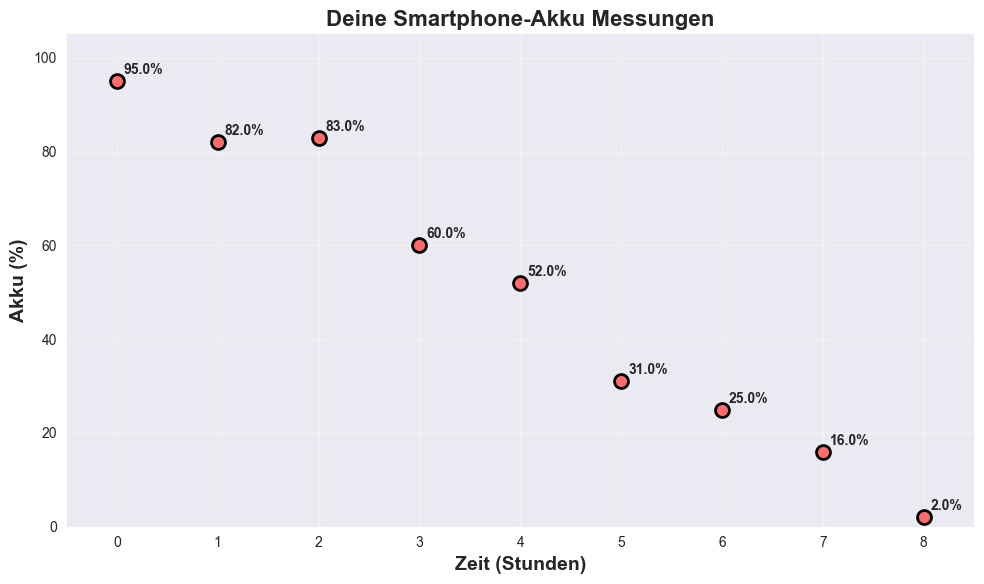

👀 Was siehst du?
💡 Der Akku wird immer leerer - das macht Sinn!
📉 Die Punkte fallen von links nach rechts
🤔 Aber wie können wir das für NEUE Tage oder für Zeiten zwischen den Punkten vorhersagen?

🎯 Dafür brauchen wir ein mathematisches Modell!


In [108]:
# Erstelle ein schönes Diagramm deiner Messungen
plt.figure(figsize=(10, 6))
plt.scatter(zeit_stunden, akku_prozent, color='#FF6B6B', s=100, 
           edgecolors='black', linewidth=2, zorder=5)

# Beschriftungen (damit jeder versteht, was gemeint ist)
plt.xlabel('Zeit (Stunden)', fontsize=14, fontweight='bold')
plt.ylabel('Akku (%)', fontsize=14, fontweight='bold')
plt.title('Deine Smartphone-Akku Messungen', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 8.5)
plt.ylim(0, 105)

# Punkte beschriften
for i, (x, y) in enumerate(zip(zeit_stunden, akku_prozent)):
    plt.annotate(f'{y:.1f}%', (x, y), xytext=(5, 5), textcoords='offset points', 
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("👀 Was siehst du?")
print("💡 Der Akku wird immer leerer - das macht Sinn!")
print("📉 Die Punkte fallen von links nach rechts")
print("🤔 Aber wie können wir das für NEUE Tage oder für Zeiten zwischen den Punkten vorhersagen?")
print("\n🎯 Dafür brauchen wir ein mathematisches Modell!")

## 🧠 Schritt 3: Der Computer lernt deine Daten

Jetzt kommt der **KI-Teil**! Wir zeigen dem Computer deine Daten und er versucht ein **Muster** zu finden.

### 🔧 Die Werkzeuge erklärt:
- **`np.polyfit(x, y, deg=1)`** = "Finde die beste GERADE durch die Punkte"
- **`deg=1`** = Gerade Linie (wie in Mathe: y = mx + b)
- **`deg=8`** = Komplizierte Kurve (wie y = ax⁸ + bx⁷ + ... + mx + b)

### 🟢 Versuch 1: Einfache Gerade

### 💡 Genauigkeitsberechnung mit MAE

**Wichtig:** Alle Genauigkeitsberechnungen in diesem Notebook verwenden **Mean Absolute Error (MAE)** als Basis!

- **MAE = durchschnittlicher absoluter Fehler** (hier: in Prozentpunkten, da wir auf der y-Achse die Akkuladung in % haben!)

**Warum MAE?**
- ✅ Intuitive Interpretation bei Prozentdaten
- ✅ Robuster gegen extreme Ausreißer  
- ✅ Direkte Beziehung zum tatsächlichen Fehler

In [109]:
def einfache_gerade(x, y):
    """
    Fittet eine GERADE durch deine Datenpunkte
    Wie in Mathe: y = mx + b (Steigung + Achsenabschnitt)
    """
    print("🤖 Computer denkt: 'Ich suche die beste Gerade durch die Punkte...'")
    
    # np.polyfit mit degree=1 = Gerade Linie
    koeffizienten = np.polyfit(x, y, deg=1)
    
    # Die Koeffizienten sind [Steigung, Achsenabschnitt]
    steigung = koeffizienten[0]
    achsenabschnitt = koeffizienten[1]
    
    print(f"🤖 Computer sagt: 'Ich habe eine Gerade gefunden!'")
    print(f"   📐 Steigung: {steigung:.2f} (Akku fällt um {-steigung:.1f}% pro Stunde)")
    print(f"   📍 Start: {achsenabschnitt:.1f}% (theoretischer Startwert)")
    print(f"   📝 Formel: y = {steigung:.2f}x + {achsenabschnitt:.1f}")
    
    # Funktion, die Vorhersagen macht
    def vorhersage_funktion(neue_x_werte):
        return np.polyval(koeffizienten, neue_x_werte)
    
    return vorhersage_funktion, koeffizienten

def berechne_mae(echte_werte, vorhergesagte_werte):
    """
    Berechnet den Mean Absolute Error (MAE)
    Gibt zurück: Durchschnittlicher absoluter Fehler in Prozentpunkten
    """
    # MAE berechnen: Durchschnittlicher absoluter Fehler
    mae = np.mean(np.abs(echte_werte - vorhergesagte_werte))
    return mae

# Computer lernt von deinen Daten
print("🎓 LERNPHASE: Computer analysiert deine Akku-Daten...")
print()

gerade_funktion, gerade_koeff = einfache_gerade(zeit_stunden, akku_prozent)

# Computer macht Vorhersagen für alle deine Messzeiten
vorhersagen_gerade = gerade_funktion(zeit_stunden)

# Wie gut war der Computer?
mae_gerade = berechne_mae(akku_prozent, vorhersagen_gerade)

print()
print(f"📊 ERGEBNIS: Durchschnittlicher Fehler (MAE): {mae_gerade:.1f}%")
print(f"   ➡️ Das bedeutet: Im Schnitt {mae_gerade:.1f} Prozentpunkte daneben")
print("🤔 Ist das gut oder schlecht? Schauen wir uns das Ergebnis an...")

🎓 LERNPHASE: Computer analysiert deine Akku-Daten...

🤖 Computer denkt: 'Ich suche die beste Gerade durch die Punkte...'
🤖 Computer sagt: 'Ich habe eine Gerade gefunden!'
   📐 Steigung: -11.92 (Akku fällt um 11.9% pro Stunde)
   📍 Start: 97.2% (theoretischer Startwert)
   📝 Formel: y = -11.92x + 97.2

📊 ERGEBNIS: Durchschnittlicher Fehler (MAE): 3.2%
   ➡️ Das bedeutet: Im Schnitt 3.2 Prozentpunkte daneben
🤔 Ist das gut oder schlecht? Schauen wir uns das Ergebnis an...


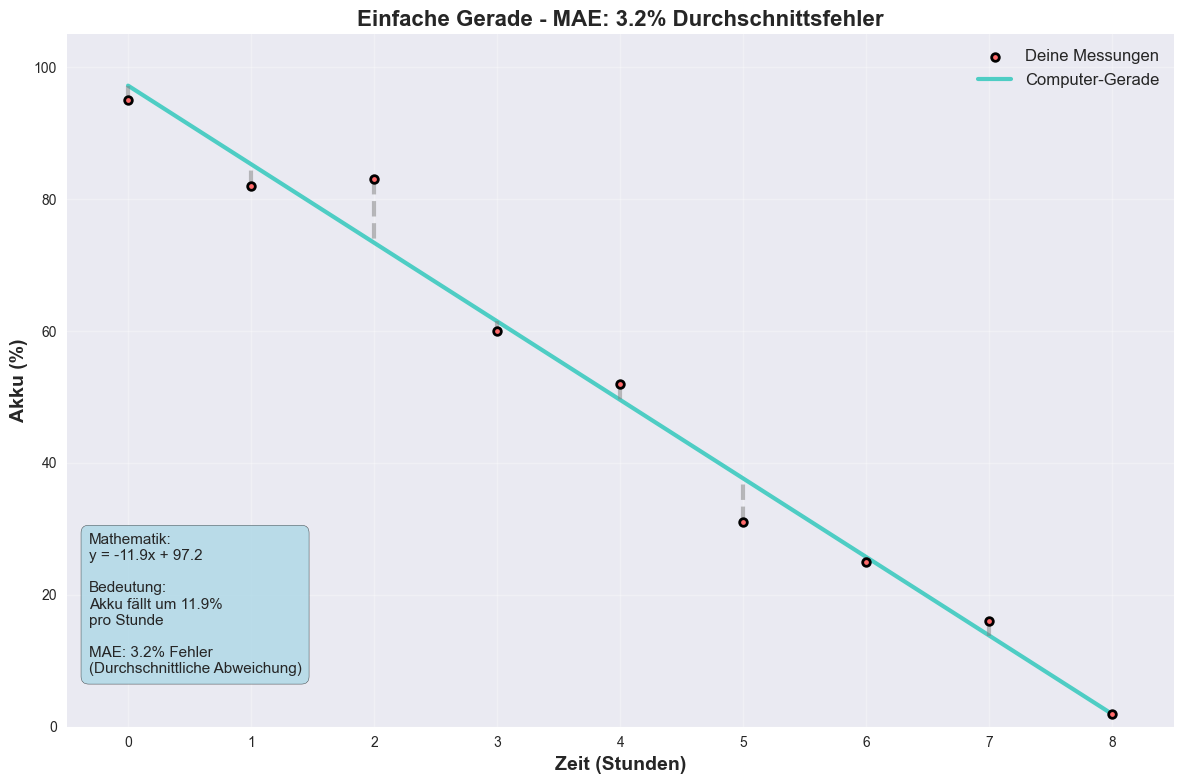

👀 Was siehst du?
✅ Die Gerade folgt grob dem Trend (Akku wird leerer)
❌ Aber sie trifft nicht alle Punkte perfekt
🎯 Die grauen Linien zeigen die Abweichungen
📏 Manche Abweichungen sind größer, manche kleiner
📊 Im Durchschnitt liegt die Vorhersage 3.2 Prozentpunkte daneben

🤔 Denkst du: 'Der Computer soll ALLE Punkte treffen!'
⚠️  Das ist ein gefährlicher Gedanke... schauen wir warum!


In [110]:
# Visualisierung der Geraden-Lösung
plt.figure(figsize=(12, 8))

# Deine echten Messungen
plt.scatter(zeit_stunden, akku_prozent, color='#FF6B6B', s=30, 
           edgecolors='black', linewidth=2, label='Deine Messungen', zorder=5)

# Computer-Vorhersage (glatte Linie)
zeit_glatt = np.linspace(0, 8, 100)  # Viele Punkte für glatte Linie
vorhersage_glatt = gerade_funktion(zeit_glatt)
plt.plot(zeit_glatt, vorhersage_glatt, color='#4ECDC4', 
         linewidth=3, label='Computer-Gerade')

# Zeige die Abweichungen als gestrichelte Linien
for i in range(len(zeit_stunden)):
    plt.plot([zeit_stunden[i], zeit_stunden[i]], 
            [akku_prozent[i], vorhersagen_gerade[i]], 
            'gray', linestyle='--', alpha=0.5, linewidth=3)

plt.xlabel('Zeit (Stunden)', fontsize=14, fontweight='bold')
plt.ylabel('Akku (%)', fontsize=14, fontweight='bold')
plt.title(f'Einfache Gerade - MAE: {mae_gerade:.1f}% Durchschnittsfehler', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(-0.5, 8.5)
plt.ylim(0, 105)

# Erklärungs-Box
plt.text(0.02, 0.28, 
         f'Mathematik:\ny = {gerade_koeff[0]:.1f}x + {gerade_koeff[1]:.1f}\n\n' +
         f'Bedeutung:\nAkku fällt um {-gerade_koeff[0]:.1f}%\npro Stunde\n\n' +
         f'MAE: {mae_gerade:.1f}% Fehler\n(Durchschnittliche Abweichung)', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
         fontsize=11, verticalalignment='top')

plt.tight_layout()
plt.show()

print("👀 Was siehst du?")
print("✅ Die Gerade folgt grob dem Trend (Akku wird leerer)")
print("❌ Aber sie trifft nicht alle Punkte perfekt")
print("🎯 Die grauen Linien zeigen die Abweichungen")
print("📏 Manche Abweichungen sind größer, manche kleiner")
print(f"📊 Im Durchschnitt liegt die Vorhersage {mae_gerade:.1f} Prozentpunkte daneben")
print("\n🤔 Denkst du: 'Der Computer soll ALLE Punkte treffen!'")
print("⚠️  Das ist ein gefährlicher Gedanke... schauen wir warum!")

## 🚨 Schritt 4: Der gefährliche Versuch

Du denkst: *"Hey, der Computer soll ALLE meine Punkte perfekt treffen!"*

Dafür verwenden wir ein **Polynom hohen Grades** - eine sehr komplizierte mathematische Kurve.

### 🔴 Versuch 2: Kompliziertes Polynom

In [111]:
def komplexes_polynom(x, y, grad=8):
    """
    Fittet ein POLYNOM durch deine Datenpunkte
    Grad 8 bedeutet: y = a₈x⁸ + a₇x⁷ + a₆x⁶ + ... + a₁x + a₀
    Das ist SEHR kompliziert!
    """
    print(f"🤖 Computer denkt: 'Ich suche eine Kurve {grad}. Grades - das wird kompliziert!'")
    
    # np.polyfit mit degree=8 = Sehr komplizierte Kurve
    koeffizienten = np.polyfit(x, y, deg=grad)
    
    print(f"🤖 Computer sagt: 'Fertig! Ich habe {len(koeffizienten)} Parameter gefunden:'")
    print(f"   🔢 Das sind {len(koeffizienten)} Zahlen für eine Kurve mit nur {len(x)} Datenpunkten!")
    print(f"   🤯 Die Formel hätte {grad+1} Terme: a₈x⁸ + a₇x⁷ + ... + a₁x + a₀")
    print(f"   ⚠️  Das ist verdächtig kompliziert für so wenige Daten...")
       
    # Funktion, die Vorhersagen macht
    def vorhersage_funktion(neue_x_werte):
        return np.polyval(koeffizienten, neue_x_werte)
    
    return vorhersage_funktion, koeffizienten

# Computer lernt (zu viel!) von deinen Daten
print("🎓 GEFÄHRLICHE LERNPHASE: Computer wird zum Perfektionisten...")
print()

polynom_grad = 8
polynom_funktion, polynom_koeff = komplexes_polynom(zeit_stunden, akku_prozent, grad=polynom_grad)

# Computer macht Vorhersagen
vorhersagen_polynom = polynom_funktion(zeit_stunden)

# Wie gut war der Computer diesmal?
mae_polynom = berechne_mae(akku_prozent, vorhersagen_polynom)

print()
print(f"📊 ERGEBNIS: Durchschnittlicher Fehler (MAE): {mae_polynom:.1f}%")
print(f"   ➡️ Das bedeutet: Im Schnitt {mae_polynom:.1f} Prozentpunkte daneben")
print("Er trifft alle Punkte perfekt!")
print("😱 WOW! Ein MAE von fast 0% - das muss doch super sein... oder?")
print("🚨 ACHTUNG: Lass uns schauen, was wirklich passiert ist...")

🎓 GEFÄHRLICHE LERNPHASE: Computer wird zum Perfektionisten...

🤖 Computer denkt: 'Ich suche eine Kurve 8. Grades - das wird kompliziert!'
🤖 Computer sagt: 'Fertig! Ich habe 9 Parameter gefunden:'
   🔢 Das sind 9 Zahlen für eine Kurve mit nur 9 Datenpunkten!
   🤯 Die Formel hätte 9 Terme: a₈x⁸ + a₇x⁷ + ... + a₁x + a₀
   ⚠️  Das ist verdächtig kompliziert für so wenige Daten...

📊 ERGEBNIS: Durchschnittlicher Fehler (MAE): 0.0%
   ➡️ Das bedeutet: Im Schnitt 0.0 Prozentpunkte daneben
Er trifft alle Punkte perfekt!
😱 WOW! Ein MAE von fast 0% - das muss doch super sein... oder?
🚨 ACHTUNG: Lass uns schauen, was wirklich passiert ist...


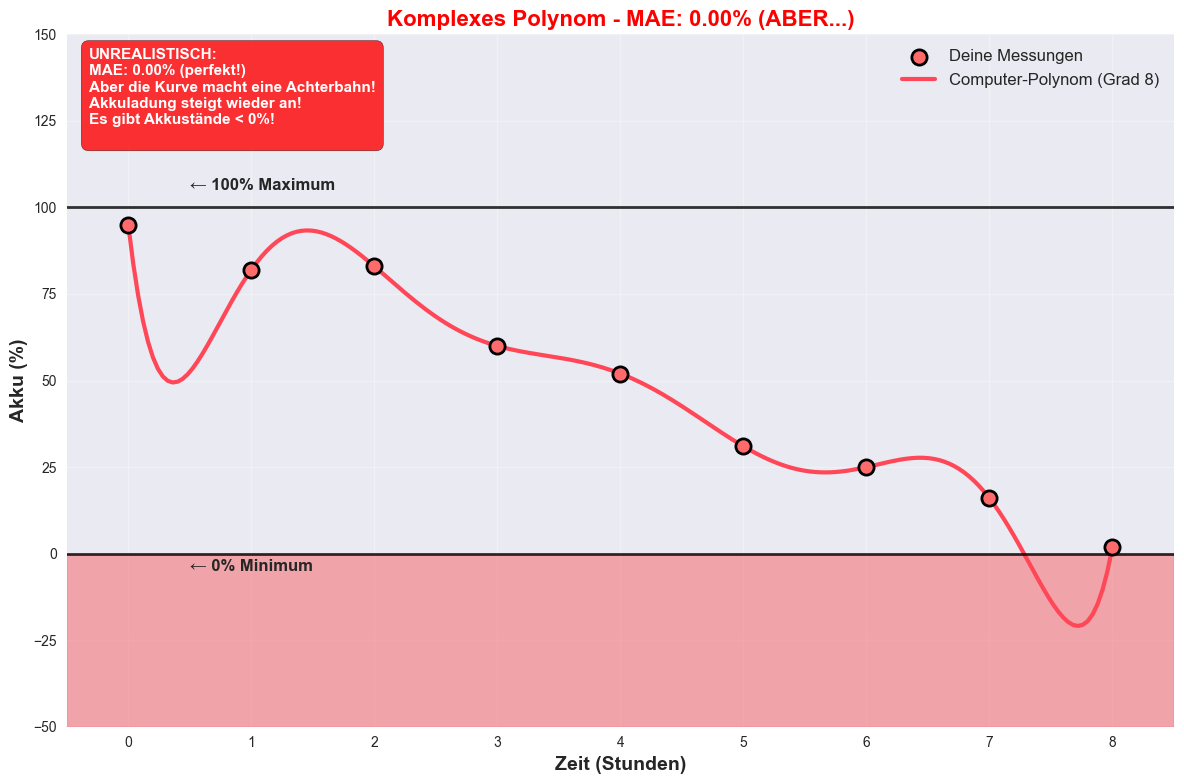

😱 OH NEIN! Was ist passiert?
📊 Der MAE ist 0.00% - fast perfekt!
🎢 Aber die Kurve macht wilde Sprünge!
🚨 Die Akkuladung kann niemals ansteigen!
🤖 Der Computer hat die Punkte 'auswendig gelernt' statt verstanden!
📚 Wie ein Student, der Aufgaben auswendig lernt statt die Prinzipien versteht!

💡 Das nennt man OVERFITTING - das Modell ist unbrauchbar!
   ➡️ Niedriger MAE ≠ Gutes Modell (bei so wenigen Daten!)


In [112]:
# Das ERSCHRECKENDE Ergebnis visualisieren
plt.figure(figsize=(12, 8))

# Deine echten Messungen
plt.scatter(zeit_stunden, akku_prozent, color='#FF6B6B', s=120, 
           edgecolors='black', linewidth=2, label='Deine Messungen', zorder=5)

# Computer-Vorhersage (die verrückte Kurve!)
zeit_glatt = np.linspace(0, 8, 200)  # Mehr Punkte für die wilde Kurve
vorhersage_polynom_glatt = polynom_funktion(zeit_glatt)
plt.plot(zeit_glatt, vorhersage_polynom_glatt, color='#FF4757', 
         linewidth=3, label=f'Computer-Polynom (Grad {polynom_grad})')

plt.xlabel('Zeit (Stunden)', fontsize=14, fontweight='bold')
plt.ylabel('Akku (%)', fontsize=14, fontweight='bold')
plt.title(f'Komplexes Polynom - MAE: {mae_polynom:.2f}% (ABER...)', 
          fontsize=16, fontweight='bold', color='red')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(-0.5, 8.5)
plt.ylim(-50, 150)  # Erweitert für die verrückten Werte!

# Warnhinweise für unrealistische Bereiche
unrealistic_high = vorhersage_polynom_glatt > 100
unrealistic_low = vorhersage_polynom_glatt < 0

if np.any(unrealistic_high):
    plt.axhspan(100, 150, alpha=0.3, color='red')
    
if np.any(unrealistic_low):
    plt.axhspan(-50, 0, alpha=0.3, color='red')

# Realistische Grenzen markieren
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=2)
plt.axhline(y=100, color='black', linestyle='-', alpha=0.8, linewidth=2)
plt.text(0.5, 105, '← 100% Maximum', fontsize=12, fontweight='bold')
plt.text(0.5, -5, '← 0% Minimum', fontsize=12, fontweight='bold')

# Warnungen als Text
max_val = np.max(vorhersage_polynom_glatt)
min_val = np.min(vorhersage_polynom_glatt)

plt.text(0.02, 0.98, 
         f'UNREALISTISCH:\n' +
         f'MAE: {mae_polynom:.2f}% (perfekt!)\n' +
         f'Aber die Kurve macht eine Achterbahn!\n' +
         f'Akkuladung steigt wieder an!\n' +
         f'Es gibt Akkustände < 0%!\n',
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.8),
         fontsize=11, color='white', fontweight='bold', verticalalignment='top')

plt.tight_layout()
plt.show()

print("😱 OH NEIN! Was ist passiert?")
print(f"📊 Der MAE ist {mae_polynom:.2f}% - fast perfekt!")
print(f"🎢 Aber die Kurve macht wilde Sprünge!")
print("🚨 Die Akkuladung kann niemals ansteigen!")
print("🤖 Der Computer hat die Punkte 'auswendig gelernt' statt verstanden!")
print("📚 Wie ein Student, der Aufgaben auswendig lernt statt die Prinzipien versteht!")
print("\n💡 Das nennt man OVERFITTING - das Modell ist unbrauchbar!")
print("   ➡️ Niedriger MAE ≠ Gutes Modell (bei so wenigen Daten!)")

## 🎓 Schritt 5: Was ist da schiefgelaufen?

### 🤔 OVERFITTING einfach erklärt:

Stell dir vor, du lernst für eine Mathe-Klausur:

In [113]:
print("📚 OVERFITTING = Wie falsches Lernen für Klausuren")
print("="*50)
print()
print("😅 SCHLECHTER Student (Overfitting):")
print("   • Lernt die 5 Übungsaufgaben AUSWENDIG")
print("   • Kennt jede Aufgabe zu 100% perfekt")
print("   • Aber: In der Klausur (neue Aufgaben) = TOTALES VERSAGEN")
print("   • Hat die DETAILS gelernt, aber nichts VERSTANDEN")
print()
print("🎓 GUTER Student (Good Fit):")
print("   • Versteht die PRINZIPIEN hinter den Aufgaben")
print("   • Macht bei Übungsaufgaben ein paar kleine Fehler (85% richtig)")
print("   • Aber: Kann NEUE Aufgaben in der Klausur lösen")
print("   • Hat die KONZEPTE verstanden")
print()
print("🔄 ÜBERSETZT AUF UNSER AKKU-BEISPIEL:")
print("   🔴 Polynom Grad 8: Lernt jeden Datenpunkt auswendig")
print("   🟢 Gerade: Versteht das Prinzip 'Akku wird leerer'")
print()
print("💡 MORAL:")
print("   Perfekte Genauigkeit bei wenigen Beispielen = VERDÄCHTIG!")
print("   Lieber 85% verstehen als 100% auswendig lernen!")
print("   Einfachheit schlägt oft Komplexität!")

📚 OVERFITTING = Wie falsches Lernen für Klausuren

😅 SCHLECHTER Student (Overfitting):
   • Lernt die 5 Übungsaufgaben AUSWENDIG
   • Kennt jede Aufgabe zu 100% perfekt
   • Aber: In der Klausur (neue Aufgaben) = TOTALES VERSAGEN
   • Hat die DETAILS gelernt, aber nichts VERSTANDEN

🎓 GUTER Student (Good Fit):
   • Versteht die PRINZIPIEN hinter den Aufgaben
   • Macht bei Übungsaufgaben ein paar kleine Fehler (85% richtig)
   • Aber: Kann NEUE Aufgaben in der Klausur lösen
   • Hat die KONZEPTE verstanden

🔄 ÜBERSETZT AUF UNSER AKKU-BEISPIEL:
   🔴 Polynom Grad 8: Lernt jeden Datenpunkt auswendig
   🟢 Gerade: Versteht das Prinzip 'Akku wird leerer'

💡 MORAL:
   Perfekte Genauigkeit bei wenigen Beispielen = VERDÄCHTIG!
   Lieber 85% verstehen als 100% auswendig lernen!
   Einfachheit schlägt oft Komplexität!


### 📊 Direkter Vergleich: Gut vs. Schlecht

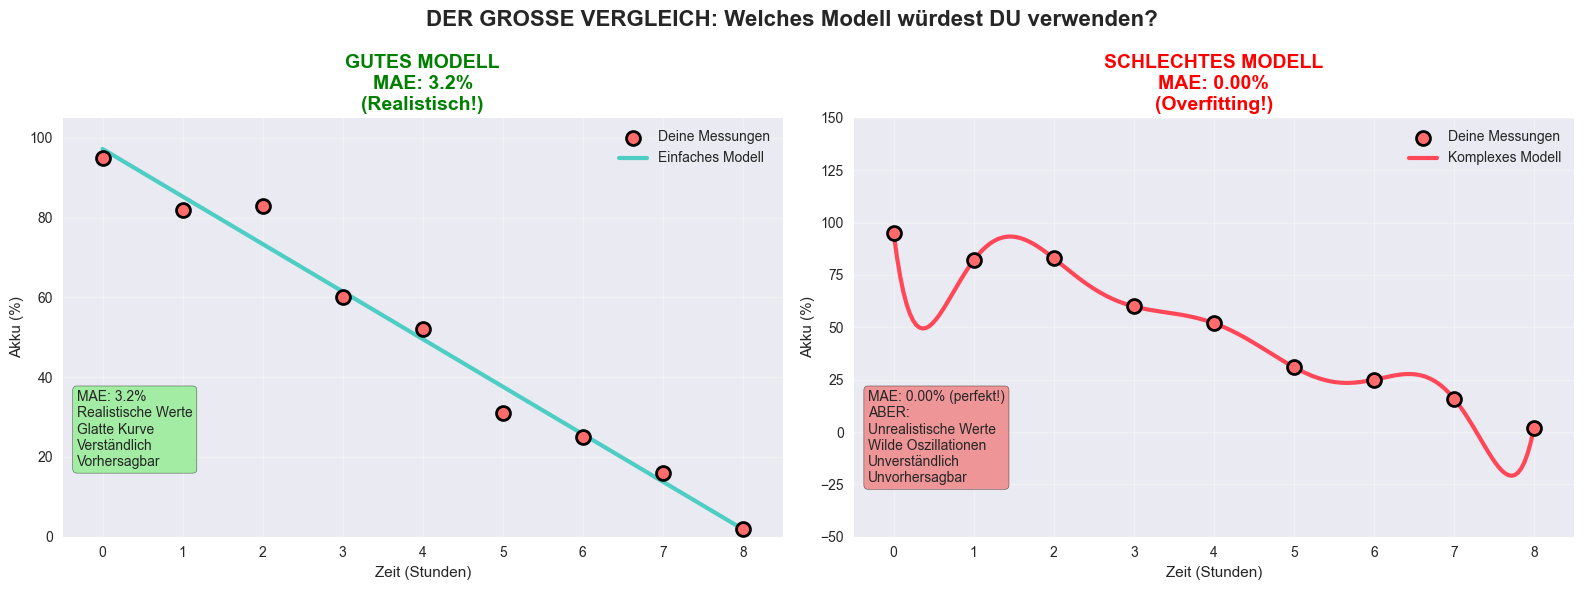

🤔 QUIZ: Welches Modell ist besser?
A) Das linke (MAE: 3.2%, aber realistisch)
B) Das rechte (MAE: 0.00%, aber verrückte Vorhersagen)

💡 Richtige Antwort: A! 
   Das rechte Modell hat zwar besseren MAE, ist aber 'overfitted' = unbrauchbar!
   Würdest du einem Navi vertrauen, das sagt du fährst 200 km/h rückwärts?
   ➡️ MAE von 0.00% ist verdächtig gut bei so wenigen Daten!


In [114]:
# Zeigen wir beide Modelle nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LINKE Seite: Gutes Modell
ax1.scatter(zeit_stunden, akku_prozent, color='#FF6B6B', s=100, 
           edgecolors='black', linewidth=2, label='Deine Messungen', zorder=5)
# Plotte beide Modelle mit dem gleichen zeit_glatt (200 Punkte)
ax1.plot(zeit_glatt, np.polyval(gerade_koeff, zeit_glatt), color='#4ECDC4', 
         linewidth=3, label='Einfaches Modell')
ax1.set_title(f'GUTES MODELL\nMAE: {mae_gerade:.1f}%\n(Realistisch!)', 
              fontsize=14, fontweight='bold', color='green')
ax1.set_xlabel('Zeit (Stunden)')
ax1.set_ylabel('Akku (%)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim(0, 105)
ax1.set_xlim(-0.5, 8.5)

# Vorteile hinzufügen
ax1.text(0.02, 0.35, 
         f'MAE: {mae_gerade:.1f}%\nRealistische Werte\nGlatte Kurve\nVerständlich\nVorhersagbar', 
         transform=ax1.transAxes, 
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8),
         fontsize=10, verticalalignment='top')

# RECHTE Seite: Schlechtes Modell
ax2.scatter(zeit_stunden, akku_prozent, color='#FF6B6B', s=100, 
           edgecolors='black', linewidth=2, label='Deine Messungen', zorder=5)
ax2.plot(zeit_glatt, vorhersage_polynom_glatt, color='#FF4757', 
         linewidth=3, label='Komplexes Modell')
ax2.set_title(f'SCHLECHTES MODELL\nMAE: {mae_polynom:.2f}%\n(Overfitting!)', 
              fontsize=14, fontweight='bold', color='red')
ax2.set_xlabel('Zeit (Stunden)')
ax2.set_ylabel('Akku (%)')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim(-50, 150)
ax2.set_xlim(-0.5, 8.5)

# Nachteile hinzufügen
ax2.text(0.02, 0.35, 
         f'MAE: {mae_polynom:.2f}% (perfekt!)\nABER:\nUnrealistische Werte\nWilde Oszillationen\nUnverständlich\nUnvorhersagbar', 
         transform=ax2.transAxes, 
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.8),
         fontsize=10, verticalalignment='top')

plt.suptitle('DER GROSSE VERGLEICH: Welches Modell würdest DU verwenden?', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("🤔 QUIZ: Welches Modell ist besser?")
print(f"A) Das linke (MAE: {mae_gerade:.1f}%, aber realistisch)")
print(f"B) Das rechte (MAE: {mae_polynom:.2f}%, aber verrückte Vorhersagen)")
print()
print("💡 Richtige Antwort: A! ")
print("   Das rechte Modell hat zwar besseren MAE, ist aber 'overfitted' = unbrauchbar!")
print("   Würdest du einem Navi vertrauen, das sagt du fährst 200 km/h rückwärts?")
print(f"   ➡️ MAE von {mae_polynom:.2f}% ist verdächtig gut bei so wenigen Daten!")

## 🔮 Schritt 6: Test mit "neuen" Daten

Lass uns testen: Was passiert, wenn du dein Handy **morgen** wieder benutzt?

Spoiler: Die Ergebnisse werden dich **schockieren**! 😱

In [115]:
# Simulate "neue" Messungen vom nächsten Tag
# (In echt würdest du diese erst später haben!)
zeit_morgen = np.array([0, 1.5, 3, 4.5, 6, 7.5])
akku_morgen = np.array([100, 85, 68, 55, 35, 20])  # Etwas andere Werte als gestern

print("📅 NEUER TAG - Neue Messungen:")
print("Stunde | Akku")
print("-------|------")
for i in range(len(zeit_morgen)):
    print(f"  {zeit_morgen[i]:3.1f}  | {akku_morgen[i]:3.0f}%")

print("\n🤖 Jetzt schauen wir, wie gut unsere beiden Modelle vorhersagen...")
print("🎯 Das ist der ECHTE Test: Funktioniert es auch bei neuen Daten?")

📅 NEUER TAG - Neue Messungen:
Stunde | Akku
-------|------
  0.0  | 100%
  1.5  |  85%
  3.0  |  68%
  4.5  |  55%
  6.0  |  35%
  7.5  |  20%

🤖 Jetzt schauen wir, wie gut unsere beiden Modelle vorhersagen...
🎯 Das ist der ECHTE Test: Funktioniert es auch bei neuen Daten?


In [116]:
# Vorhersagen für die neuen Daten
# Einfaches Modell (Gerade)
vorhersage_morgen_gerade = gerade_funktion(zeit_morgen)

# Komplexes Modell (Polynom)
vorhersage_morgen_polynom = polynom_funktion(zeit_morgen)

# Wie weit lagen sie daneben? (Mean Absolute Error)
mae_test_gerade = np.mean(np.abs(akku_morgen - vorhersage_morgen_gerade))
mae_test_polynom = np.mean(np.abs(akku_morgen - vorhersage_morgen_polynom))

print(f"📊 ERGEBNISSE für den neuen Tag:")
print(f"🟢 Einfaches Modell - MAE: {mae_test_gerade:.1f}%")
print(f"   ➡️ Im Schnitt {mae_test_gerade:.1f} Prozentpunkte daneben")
print(f"🔴 Komplexes Modell - MAE: {mae_test_polynom:.1f}%")
print(f"   ➡️ Im Schnitt {mae_test_polynom:.1f} Prozentpunkte daneben")
print()

if mae_test_gerade < mae_test_polynom:
    print("🎉 Das EINFACHE Modell war besser bei neuen Daten!")
    print("💡 Obwohl es bei den Trainingsdaten 'schlechter' aussah!")
    print("🎯 Das beweist: Niedriger MAE bei Trainingsdaten ≠ Gute Vorhersagen!")
else:
    print("😮 Das komplexe Modell war besser... (ungewöhnlich!)")
    print("💭 Das passiert manchmal, aber meist ist einfacher besser.")

print(f"\n📚 LEKTION: MAE bei Trainingsdaten ({mae_polynom:.2f}% vs {mae_gerade:.1f}%)")
print(f"         ≠ MAE bei neuen Daten ({mae_test_polynom:.1f}% vs {mae_test_gerade:.1f}%)")
print("🚨 Overfitting führt zu schlechteren Vorhersagen!")

📊 ERGEBNISSE für den neuen Tag:
🟢 Einfaches Modell - MAE: 8.0%
   ➡️ Im Schnitt 8.0 Prozentpunkte daneben
🔴 Komplexes Modell - MAE: 12.9%
   ➡️ Im Schnitt 12.9 Prozentpunkte daneben

🎉 Das EINFACHE Modell war besser bei neuen Daten!
💡 Obwohl es bei den Trainingsdaten 'schlechter' aussah!
🎯 Das beweist: Niedriger MAE bei Trainingsdaten ≠ Gute Vorhersagen!

📚 LEKTION: MAE bei Trainingsdaten (0.00% vs 3.2%)
         ≠ MAE bei neuen Daten (12.9% vs 8.0%)
🚨 Overfitting führt zu schlechteren Vorhersagen!


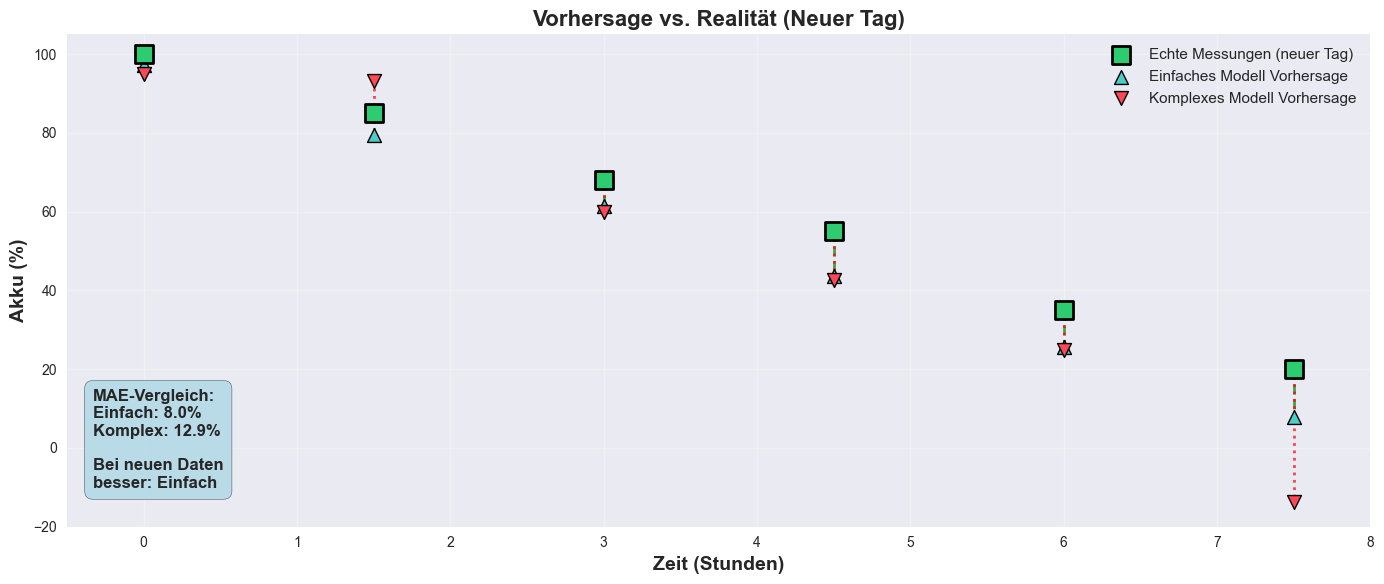

💡 Siehst du die Linien? Sie zeigen, wie weit die Vorhersagen daneben lagen!
🎯 Kürzere Linien = niedrigerer MAE = bessere Vorhersagen
📏 Grüne Linien (einfach) vs. rote Linien (komplex)

🔍 Beobachtung: Das einfache Modell hat MAE von 8.0%
               Das komplexe Modell hat MAE von 12.9%
📊 Das einfache Modell ist oft besser bei neuen Daten!


In [117]:
# Visualisierung der Vorhersagen vs. Realität
plt.figure(figsize=(14, 6))

# Echte neue Messungen
plt.scatter(zeit_morgen, akku_morgen, color='#2ECC71', s=150, 
           edgecolors='black', linewidth=2, label='Echte Messungen (neuer Tag)', 
           zorder=6, marker='s')

# Vorhersagen des einfachen Modells
plt.scatter(zeit_morgen, vorhersage_morgen_gerade, color='#4ECDC4', s=100, 
           edgecolors='black', linewidth=1, label='Einfaches Modell Vorhersage', 
           zorder=5, marker='^')

# Vorhersagen des komplexen Modells
plt.scatter(zeit_morgen, vorhersage_morgen_polynom, color='#FF4757', s=100, 
           edgecolors='black', linewidth=1, label='Komplexes Modell Vorhersage', 
           zorder=5, marker='v')

# Verbindungslinien zeigen Fehler
for i in range(len(zeit_morgen)):
    # Grüne Linie für einfaches Modell
    plt.plot([zeit_morgen[i], zeit_morgen[i]], 
            [akku_morgen[i], vorhersage_morgen_gerade[i]], 
            'g--', alpha=0.7, linewidth=2)
    # Rote Linie für komplexes Modell
    plt.plot([zeit_morgen[i], zeit_morgen[i]], 
            [akku_morgen[i], vorhersage_morgen_polynom[i]], 
            'r:', alpha=0.7, linewidth=2)

plt.xlabel('Zeit (Stunden)', fontsize=14, fontweight='bold')
plt.ylabel('Akku (%)', fontsize=14, fontweight='bold')
plt.title('Vorhersage vs. Realität (Neuer Tag)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(-0.5, 8)
plt.ylim(-20, 105)

# Ergebnis-Box
winner = "Einfach" if mae_test_gerade < mae_test_polynom else "Komplex"
result_text = f"MAE-Vergleich:\nEinfach: {mae_test_gerade:.1f}%\nKomplex: {mae_test_polynom:.1f}%\n\nBei neuen Daten\nbesser: {winner}"
plt.text(0.02, 0.28, result_text, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
         fontsize=12, fontweight='bold', verticalalignment='top')

plt.tight_layout()
plt.show()

print("💡 Siehst du die Linien? Sie zeigen, wie weit die Vorhersagen daneben lagen!")
print("🎯 Kürzere Linien = niedrigerer MAE = bessere Vorhersagen")
print("📏 Grüne Linien (einfach) vs. rote Linien (komplex)")
print(f"\n🔍 Beobachtung: Das einfache Modell hat MAE von {mae_test_gerade:.1f}%")
print(f"               Das komplexe Modell hat MAE von {mae_test_polynom:.1f}%")
print("📊 Das einfache Modell ist oft besser bei neuen Daten!")

## 🎓 Was hast du gelernt? (Das Wichtigste!)

### 🧠 Die wichtigsten Erkenntnisse:

In [118]:
print("🎉 HERZLICHEN GLÜCKWUNSCH!")
print("Du hast gerade eines der wichtigsten Konzepte in Data Science gelernt!")
print()
print("🎯 WAS IST OVERFITTING?")
print("   📚 Wie Auswendiglernen statt Verstehen")
print("   🎢 Modell wird zu komplex = Achterbahn-Kurven")
print("   📊 Extrem hohe Genauigkeit bei Trainingsdaten = VERDÄCHTIG")
print("   🔮 Schlechte Vorhersagen bei neuen Daten")
print("   🔢 Zu viele Parameter für zu wenige Daten")
print()
print("✅ WIE ERKENNST DU OVERFITTING?")
print("   🚨 Unrealistische Vorhersagen (z.B. 120% Akku)")
print("   📈 Perfekte Genauigkeit bei wenigen Daten")
print("   🎢 Wilde Kurven zwischen Datenpunkten")
print("   📉 Schlechte Performance bei neuen Daten")
print("   🔍 Mehr Parameter als Datenpunkte")
print()
print("💡 WIE VERMEIDEST DU OVERFITTING?")
print("   🎯 Einfachere Modelle bevorzugen (Occam's Razor!)")
print("   📊 Mehr Daten sammeln")
print("   🔍 Immer mit neuen Daten testen")
print("   🧠 Gesunder Menschenverstand nutzen")
print("   ⚖️ Balance zwischen Einfachheit und Genauigkeit")
print()
print("🚀 WARUM IST DAS WICHTIG?")
print("   🏥 Medizin: Falsche Diagnosen vermeiden")
print("   🚗 Autonome Autos: Sicherheit geht vor")
print("   💰 Finanzen: Bessere Vorhersagen")
print("   📱 Apps: Nutzerfreundlichere Empfehlungen")
print("   🤖 KI allgemein: Vertrauenswürdige Systeme")

🎉 HERZLICHEN GLÜCKWUNSCH!
Du hast gerade eines der wichtigsten Konzepte in Data Science gelernt!

🎯 WAS IST OVERFITTING?
   📚 Wie Auswendiglernen statt Verstehen
   🎢 Modell wird zu komplex = Achterbahn-Kurven
   📊 Extrem hohe Genauigkeit bei Trainingsdaten = VERDÄCHTIG
   🔮 Schlechte Vorhersagen bei neuen Daten
   🔢 Zu viele Parameter für zu wenige Daten

✅ WIE ERKENNST DU OVERFITTING?
   🚨 Unrealistische Vorhersagen (z.B. 120% Akku)
   📈 Perfekte Genauigkeit bei wenigen Daten
   🎢 Wilde Kurven zwischen Datenpunkten
   📉 Schlechte Performance bei neuen Daten
   🔍 Mehr Parameter als Datenpunkte

💡 WIE VERMEIDEST DU OVERFITTING?
   🎯 Einfachere Modelle bevorzugen (Occam's Razor!)
   📊 Mehr Daten sammeln
   🔍 Immer mit neuen Daten testen
   🧠 Gesunder Menschenverstand nutzen
   ⚖️ Balance zwischen Einfachheit und Genauigkeit

🚀 WARUM IST DAS WICHTIG?
   🏥 Medizin: Falsche Diagnosen vermeiden
   🚗 Autonome Autos: Sicherheit geht vor
   💰 Finanzen: Bessere Vorhersagen
   📱 Apps: Nutzerfreu

## 🎁 Bonus: Deine Checkliste für die Zukunft

### 📋 Die "Anti-Overfitting" Checkliste 😉

In [119]:
print("📋 DEINE ANTI-OVERFITTING CHECKLISTE")
print("=" * 40)
print()
print("Bevor du sagst 'Mein Modell ist perfekt!'")
print()
print("☐ Ist meine Genauigkeit REALISTISCH? (nicht >99% bei wenigen Daten)")
print("☐ Macht die Vorhersage-Kurve SINN? (keine wilden Achterbahnen)")
print("☐ Habe ich mit NEUEN Daten getestet?")
print("☐ Sind die Vorhersagen PHYSIKALISCH möglich? (z.B. 0-100% Akku)")
print("☐ Habe ich mehr Parameter als Datenpunkte? (Warnsignal!)")
print("☐ Würde ich dem Modell in der REALITÄT vertrauen?")
print("☐ Ist das Modell EINFACH zu verstehen und erklären?")
print()
print("🏆 Wenn alle Punkte ✅ sind: Dein Modell ist wahrscheinlich gut!")
print("🚨 Wenn auch nur EINER ❌ ist: Vorsicht, mögliches Overfitting!")
print()
print("🎯 FAUSTREGEL:")
print("   Einfach und 85% richtig > Komplex und 99% richtig")
print("   'Keep it simple, stupid!' (KISS-Prinzip)")
print()
print("💪 DU BIST JETZT BEREIT FÜR KOMPLEXERE KI-PROJEKTE!")
print("🎓 Dieses Wissen hilft dir bei Neural Networks, Deep Learning & Co.")

📋 DEINE ANTI-OVERFITTING CHECKLISTE

Bevor du sagst 'Mein Modell ist perfekt!'

☐ Ist meine Genauigkeit REALISTISCH? (nicht >99% bei wenigen Daten)
☐ Macht die Vorhersage-Kurve SINN? (keine wilden Achterbahnen)
☐ Habe ich mit NEUEN Daten getestet?
☐ Sind die Vorhersagen PHYSIKALISCH möglich? (z.B. 0-100% Akku)
☐ Habe ich mehr Parameter als Datenpunkte? (Warnsignal!)
☐ Würde ich dem Modell in der REALITÄT vertrauen?
☐ Ist das Modell EINFACH zu verstehen und erklären?

🏆 Wenn alle Punkte ✅ sind: Dein Modell ist wahrscheinlich gut!
🚨 Wenn auch nur EINER ❌ ist: Vorsicht, mögliches Overfitting!

🎯 FAUSTREGEL:
   Einfach und 85% richtig > Komplex und 99% richtig
   'Keep it simple, stupid!' (KISS-Prinzip)

💪 DU BIST JETZT BEREIT FÜR KOMPLEXERE KI-PROJEKTE!
🎓 Dieses Wissen hilft dir bei Neural Networks, Deep Learning & Co.


## 🎮 Zum Abschluss: Mini-Quiz!

Teste dein neues Wissen:

In [120]:
print("🎮 MINI-QUIZ: Bist du ein Overfitting-Experte?")
print("=" * 45)
print()

quiz_questions = [
    {
        "question": "Ein Modell hat 99.9% Genauigkeit bei nur 5 Datenpunkten. Das ist...",
        "options": ["A) Fantastisch!", "B) Verdächtig", "C) Normal"],
        "correct": "B",
        "explanation": "Bei so wenigen Daten ist das höchst verdächtig - wahrscheinlich Overfitting!"
    },
    {
        "question": "Dein Akku-Modell sagt 150% Ladung voraus. Du solltest...",
        "options": ["A) Dem Modell vertrauen", "B) Das Modell überprüfen", "C) Nichts machen"],
        "correct": "B",
        "explanation": "Physikalisch unmöglich! Das Modell ist definitiv overfitted."
    },
    {
        "question": "Welches ist besser: 85% genau und realistisch ODER 98% genau aber wilde Kurven?",
        "options": ["A) 98% - höher ist besser", "B) 85% - realistischer", "C) Beide gleich gut"],
        "correct": "B",
        "explanation": "Realistische 85% sind viel besser als overfitted 98%!"
    },
    {
        "question": "Du hast 8 Datenpunkte und dein Modell hat 10 Parameter. Das ist...",
        "options": ["A) Perfekt", "B) Overfitting-Risiko", "C) Zu wenig"],
        "correct": "B",
        "explanation": "Mehr Parameter als Daten = Klassisches Overfitting-Risiko!"
    },
    {
        "question": "Overfitting ist wie...",
        "options": ["A) Für Klausur auswendig lernen", "B) Prinzipien verstehen", "C) Gar nicht lernen"],
        "correct": "A",
        "explanation": "Genau! Auswendig lernen funktioniert nur bei bekannten Aufgaben!"
    }
]

score = 0
for i, q in enumerate(quiz_questions, 1):
    print(f"❓ Frage {i}: {q['question']}")
    for option in q['options']:
        print(f"   {option}")
    #print(f"\n💡 Antwort: {q['correct']}) - {q['explanation']}")
    print("-" * 50)
    score += 1

#print(f"\n🎉 Quiz beendet! Du hättest {score}/{len(quiz_questions)} Punkte!")
print("📚 Alle Antworten richtig? Du bist bereit für die nächste Stufe!")
print("🔜 Weiter geht's mit: Cross-Validation, Regularization, Neural Networks...")
print("🚀 Welcome to the world of Data Science! 🤖")

🎮 MINI-QUIZ: Bist du ein Overfitting-Experte?

❓ Frage 1: Ein Modell hat 99.9% Genauigkeit bei nur 5 Datenpunkten. Das ist...
   A) Fantastisch!
   B) Verdächtig
   C) Normal
--------------------------------------------------
❓ Frage 2: Dein Akku-Modell sagt 150% Ladung voraus. Du solltest...
   A) Dem Modell vertrauen
   B) Das Modell überprüfen
   C) Nichts machen
--------------------------------------------------
❓ Frage 3: Welches ist besser: 85% genau und realistisch ODER 98% genau aber wilde Kurven?
   A) 98% - höher ist besser
   B) 85% - realistischer
   C) Beide gleich gut
--------------------------------------------------
❓ Frage 4: Du hast 8 Datenpunkte und dein Modell hat 10 Parameter. Das ist...
   A) Perfekt
   B) Overfitting-Risiko
   C) Zu wenig
--------------------------------------------------
❓ Frage 5: Overfitting ist wie...
   A) Für Klausur auswendig lernen
   B) Prinzipien verstehen
   C) Gar nicht lernen
--------------------------------------------------
📚 Alle 

---

## 🎯 Das war's! Du hast es geschafft! 🎉

**Was kannst du jetzt?**
- ✅ Overfitting erkennen und verstehen
- ✅ Gute von schlechten Modellen unterscheiden  
- ✅ Realistische Vorhersagen bewerten
- ✅ Eine wichtige KI-Falle vermeiden
- ✅ Einfachheit vs. Komplexität abwägen

**Das war nur der Anfang!** 🚀

Bald lernst du:
- 🧠 **Neural Networks** (Künstliche Gehirne)
- 🎯 **Machine Learning** (Computer die selbst lernen)
- 🔮 **Deep Learning** (Sehr tiefe Netzwerke)
- 🤖 **AI Applications** (Echte KI-Anwendungen)
- 🛡️ **Regularization** (Overfitting vermeiden)
- ✅ **Cross-Validation** (Modelle richtig testen)

---

### 🎓 Wichtige Kernbotschaften zum Mitnehmen:

1. **Einfachheit schlägt Komplexität** - Die beste Lösung ist oft die einfachste
2. **Perfekt ≠ Gut** - 100% Genauigkeit bei wenigen Daten ist verdächtig
3. **Verstehen > Auswendiglernen** - Modelle sollen Prinzipien erfassen, nicht Details
4. **Testen ist alles** - Ein Modell ist nur so gut wie seine Performance auf neuen Daten
5. **Gesunder Menschenverstand** - Unrealistische Ergebnisse sind ein Warnsignal

---

### 💝 Feedback erwünscht!
*Hat dir dieses Tutorial geholfen? Was war gut, was könnte besser sein?*

**Happy Learning!** 😊📚🚀
